In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
from dateutil.parser import parse

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo= False)

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:

inspector=inspect(engine)
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

# session.query(Invoices.BillingCountry).group_by(Invoices.BillingCountry).all()
# session.query()

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
inspector=inspect(engine)
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [26]:
# Find the most recent date in the data set.
#engine.execute('SELECT * FROM measurement ORDER BY date DESC LIMIT 1').fetchall()

recentDate = session.query(Measurement.date).order_by(Measurement.date.desc()).limit(1).all()
recentDate=recentDate[0]

list_to_strin = " ".join(map(str, x)) 
parse(list_to_strin)

#datetime_object = datetime.strptime(list_to_strin,'%d/%m/%y %H:%M')
# datetime_object

datetime.datetime(2017, 8, 23, 0, 0)

array([[<AxesSubplot:title={'center':'prcp'}>]], dtype=object)

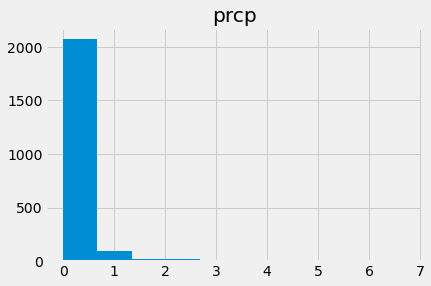

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

oneYearFromDate = dt.date(2017,8,23)-dt.timedelta(days=365)
oneYearFromDate

# Perform a query to retrieve the data and precipitation scores

prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > oneYearFromDate).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_date_df=pd.DataFrame(prcp_data)
prcp_date_df.set_index('date', inplace=True, )

# Sort the dataframe by date

prcp_date_df.sort_index()
prcp_date_df['prcp'] = prcp_date_df['prcp'].fillna(0)
prcp_date_df

# Use Pandas Plotting with Matplotlib to plot the data

# plot=prcp_date_df.plot()
# plot.set_title(f"Precipitation ({oneYearFromDate} to 8/23/17)")
# plot.set_ylabel('precipitation')


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()